# Linear Regression

Linear regression is a fundamental machine learning algorithm used to model the relationship between a dependent variable and one or more independent variables. In this homework, we'll implement linear regression from scratch to understand its inner workings. We'll start with a simple case of predicting profits for a food truck based on the population of the city it's in.
We'll begin by setting up our environment and loading the dataset. This involves importing the necessary Python libraries and reading our data from a file.

   Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
       Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000


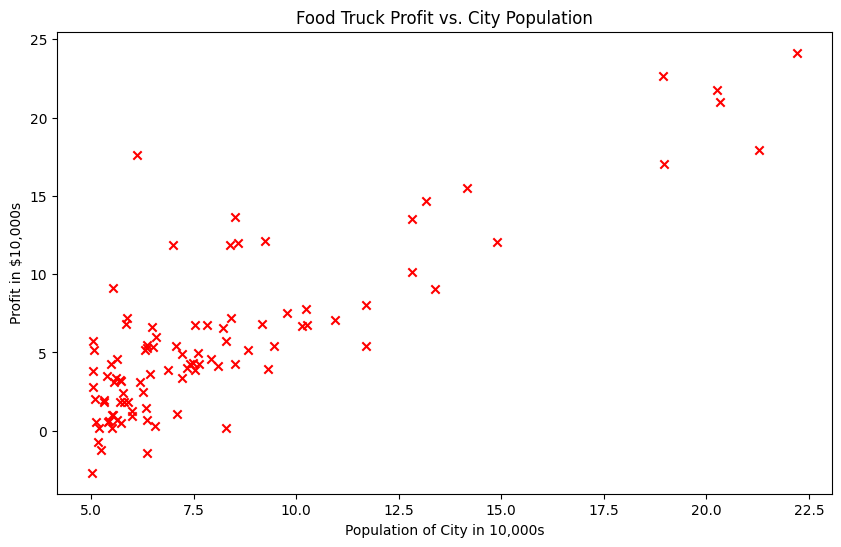

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])

# Print the first few rows of the dataset
print(data.head())

# Print some basic statistics of the dataset
print(data.describe())

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(data['Population'], data['Profit'], c='red', marker='x')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Food Truck Profit vs. City Population')
plt.show()

Data visualization is an essential step in any data analysis or machine learning project. It helps us understand the structure of our data, identify patterns, detect outliers, and gain insights into potential relationships between variables. For our linear regression problem, we'll create a scatter plot to visualize the relationship between city population and food truck profit.

Linear regression aims to find a linear relationship between the input variable (population) and the output variable (profit). We'll use the hypothesis function h(x) = θ₀ + θ₁x, where θ₀ and θ₁ are the parameters we need to learn.

The cost function J(θ) measures how well our hypothesis fits the data. We'll use the mean squared error cost function. Gradient descent is an optimization algorithm that we'll use to find the values of θ₀ and θ₁ that minimize the cost function.

In [3]:
#Cost Function:

import numpy as np

def compute_cost(X, y, theta):
    """
    Compute the cost function J(theta) for linear regression.

    Args:
    X : numpy array of shape (m, n+1) - m examples, n features (plus intercept term)
    y : numpy array of shape (m,) - target values
    theta : numpy array of shape (n+1,) - current parameters

    Returns:
    J : float - the current value of the cost function
    """
    # TODO: Implement the cost function
    # 1. Compute the number of training examples (m)
    # 2. Compute the predictions using X and theta
    # 3. Compute the squared errors
    # 4. Compute the average cost
    m = len(y)
    h = X @ theta
    J = (1 / (2 * m)) * np.sum((h - y) ** 2)

    return J

# Test the cost function
X = np.column_stack((np.ones(len(data)), data['Population']))
y = data['Profit'].values
theta = np.zeros(2)

print(f"Cost at initial theta (zeros): {compute_cost(X, y, theta):.3f}")

Cost at initial theta (zeros): 32.073


In [4]:
def compute_cost(X, y, theta):
    m = len(y)  # number of training examples
    predictions = X.dot(theta)  # predictions of hypothesis on all m examples
    sqr_errors = (predictions - y) ** 2  # squared errors

    J = (1 / (2 * m)) * np.sum(sqr_errors)  # average cost
    return J

# Test the cost function
X = np.column_stack((np.ones(len(data)), data['Population']))
y = data['Profit'].values
theta = np.zeros(2)

print(f"Cost at initial theta (zeros): {compute_cost(X, y, theta):.3f}")

Cost at initial theta (zeros): 32.073


In [5]:
#Gradient Descent

def gradient_descent(X, y, theta, alpha, num_iters):
    """
    Perform gradient descent to optimize theta.

    Args:
    X : numpy array of shape (m, n+1) - m examples, n features (plus intercept term)
    y : numpy array of shape (m,) - target values
    theta : numpy array of shape (n+1,) - initial parameters
    alpha : float - learning rate
    num_iters : int - number of iterations to run gradient descent

    Returns:
    theta : numpy array of shape (n+1,) - the optimized parameters
    J_history : list - the cost function value history
    """
    # TODO: Implement gradient descent
    # 1. Get the number of training examples (m)
    # 2. Make a copy of theta to update
    # 3. Create an empty list to store cost function history
    # 4. Implement the gradient descent loop:
    #    a. Compute predictions
    #    b. Compute the errors
    #    c. Update theta
    #    d. Calculate and store the cost for this iteration
    m = len(y)
    theta = theta.copy()
    J_history = []

    return theta, J_history

# Run gradient descent
theta = np.zeros(2)
iterations = 1500
alpha = 0.01

theta, J_history = gradient_descent(X, y, theta, alpha, iterations)

print("Theta found by gradient descent:")
print(f"theta_0 = {theta[0]:.4f}")
print(f"theta_1 = {theta[1]:.4f}")

Theta found by gradient descent:
theta_0 = 0.0000
theta_1 = 0.0000


In [6]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    theta = theta.copy()
    J_history = []

    for _ in range(num_iters):
        predictions = X.dot(theta)
        errors = predictions - y
        theta = theta - (alpha / m) * X.T.dot(errors)
        J_history.append(compute_cost(X, y, theta))

    return theta, J_history

# Run gradient descent
theta = np.zeros(2)
iterations = 1500
alpha = 0.01

theta, J_history = gradient_descent(X, y, theta, alpha, iterations)

print("Theta found by gradient descent:")
print(f"theta_0 = {theta[0]:.4f}")
print(f"theta_1 = {theta[1]:.4f}")

Theta found by gradient descent:
theta_0 = -3.6303
theta_1 = 1.1664


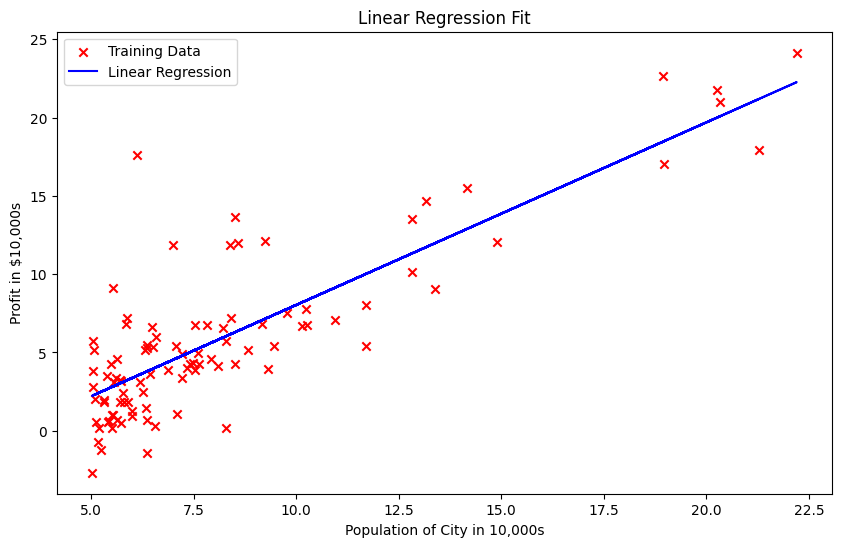

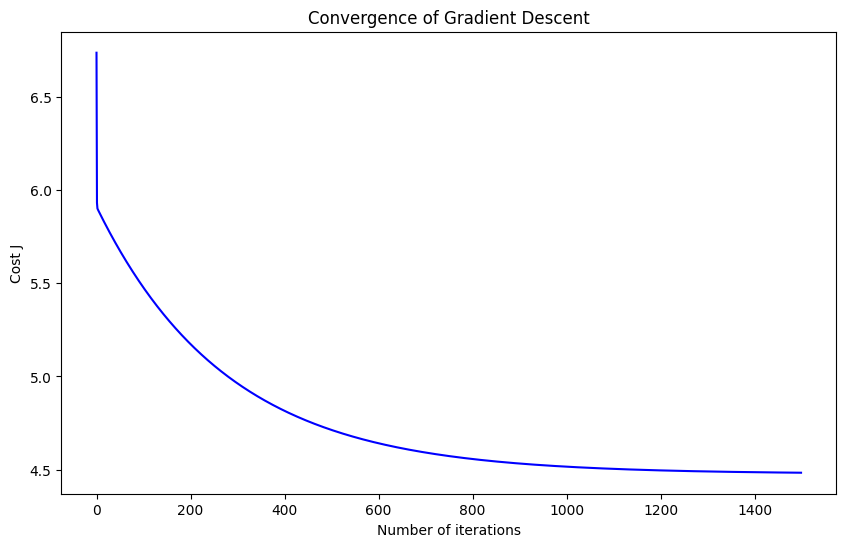

Observations:
1. The linear fit appears to capture the general trend in the data.
2. The cost function decreases rapidly at first and then levels off, indicating convergence.
3. The final cost is: 4.483388256587725


In [7]:
# Plot the linear fit
plt.figure(figsize=(10, 6))
plt.scatter(data['Population'], data['Profit'], color='red', marker='x', label='Training Data')
plt.plot(X[:, 1], X.dot(theta), color='blue', label='Linear Regression')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

# Plot the convergence graph
plt.figure(figsize=(10, 6))
plt.plot(range(len(J_history)), J_history, color='blue')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Convergence of Gradient Descent')
plt.show()

print("Observations:")
print("1. The linear fit appears to capture the general trend in the data.")
print("2. The cost function decreases rapidly at first and then levels off, indicating convergence.")
print("3. The final cost is:", J_history[-1])

Now that we have trained our linear regression model and found the optimal values for θ₀ and θ₁, we can use these parameters to make predictions for new input values. Our hypothesis function h(x) = θ₀ + θ₁x allows us to estimate the profit for a food truck in a city with a given population. We'll make predictions for a couple of specific population values and then create a function to make predictions for any given population.


For population = 35,000, predicted profit = $4519.77
For population = 70,000, predicted profit = $45342.45


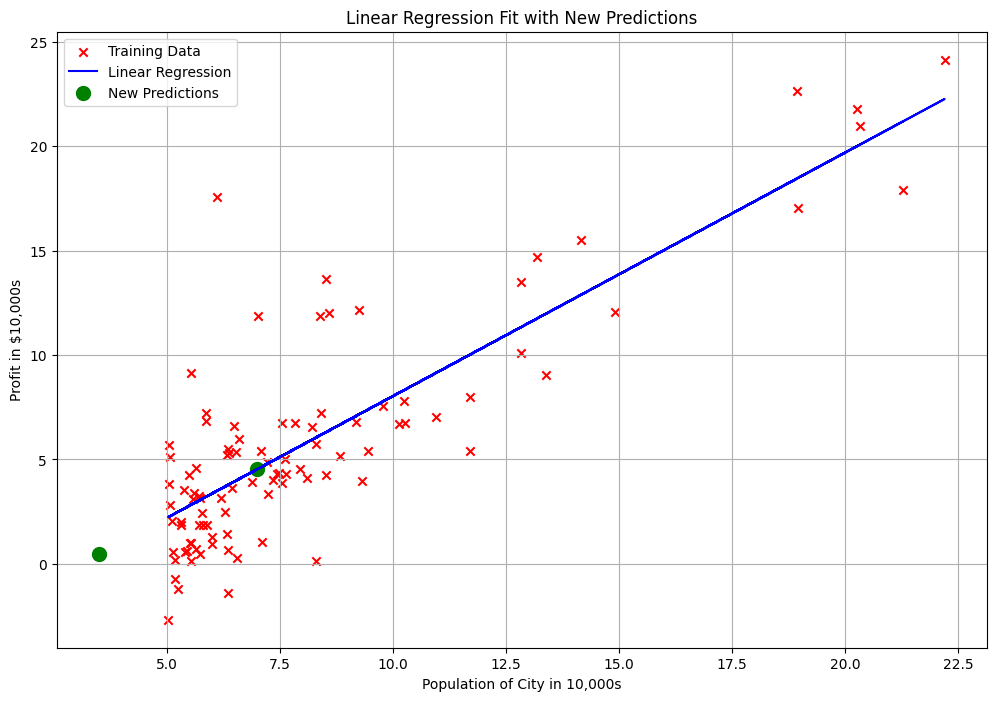


Observations:
1. The model predicts higher profits for cities with larger populations, which aligns with our initial observations.
2. The predictions seem reasonable given the trend in our training data.
3. Remember that these predictions are in $10,000s, so multiply by 10,000 to get the actual dollar amount.
4. The model extrapolates linearly for populations outside our training data range, which may not always be accurate in real-world scenarios.


In [8]:
# 1. Predict profit for population of 35,000
population1 = 3.5  # 35,000 / 10,000
prediction1 = theta[0] + theta[1] * population1

# 2. Predict profit for population of 70,000
population2 = 7.0  # 70,000 / 10,000
prediction2 = theta[0] + theta[1] * population2

# 3. Create a prediction function
def predict_profit(population):
    """
    Predict the profit for a given population.

    Args:
    population : float - the population of the city in actual numbers

    Returns:
    float - the predicted profit in $10,000s
    """
    scaled_population = population / 10000
    return theta[0] + theta[1] * scaled_population

# 4. Use the function for predictions
prediction1_func = predict_profit(35000)
prediction2_func = predict_profit(70000)

# 5. Create the plot
plt.figure(figsize=(12, 8))
plt.scatter(data['Population'], data['Profit'], color='red', marker='x', label='Training Data')
plt.plot(X[:, 1], X.dot(theta), color='blue', label='Linear Regression')
plt.scatter([3.5, 7], [prediction1, prediction2], color='green', s=100, label='New Predictions')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Linear Regression Fit with New Predictions')
plt.legend()
plt.grid(True)

# Print predictions and show plot
print(f"For population = 35,000, predicted profit = ${prediction1_func*10000:.2f}")
print(f"For population = 70,000, predicted profit = ${prediction2_func*10000:.2f}")
plt.show()

print("\nObservations:")
print("1. The model predicts higher profits for cities with larger populations, which aligns with our initial observations.")
print("2. The predictions seem reasonable given the trend in our training data.")
print("3. Remember that these predictions are in $10,000s, so multiply by 10,000 to get the actual dollar amount.")
print("4. The model extrapolates linearly for populations outside our training data range, which may not always be accurate in real-world scenarios.")


Visualizing the cost function J(θ) is crucial for understanding the optimization process in linear regression. The cost function J(θ) is a function of the parameters θ₀ and θ₁. By creating 3D surface and contour plots, we can visualize how the cost changes as we vary these parameters. This will give us insight into why gradient descent moves towards the minimum of this function.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_cost_function(X, y):
    """
    Create a 3D surface plot and a contour plot of the cost function J(theta).

    Args:
    X : numpy array of shape (m, n+1) - m examples, n features (plus intercept term)
    y : numpy array of shape (m,) - target values
    """
    # TODO: Implement the following steps:

    # 1. Create a grid of theta0 and theta1 values
    # Hint: Use np.linspace to create ranges for theta0 and theta1

    # 2. Initialize J_vals to a matrix of 0's

    # 3. Calculate the cost for each combination of theta0 and theta1
    # Hint: Use nested loops to iterate over theta0_vals and theta1_vals

    # 4. Create a 3D surface plot
    # Hint: Use fig.add_subplot(111, projection='3d') to create a 3D subplot

    # 5. Create a contour plot
    # Hint: Use plt.contour for the contour plot

    # 6. Mark the minimum point on both plots
    # Hint: Use the theta values found by gradient descent

    # 7. Add labels, titles, and display the plots

# Call the function with our data
plot_cost_function(X, y)

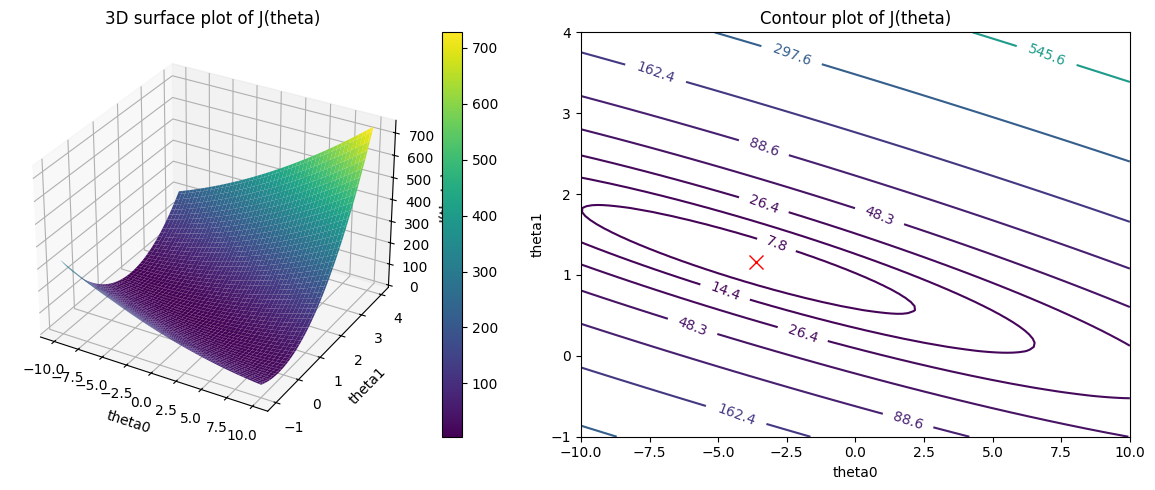

Observations:
1. The 3D surface plot shows the 'bowl' shape of the cost function.
2. The contour plot shows the same information in 2D, with contour lines representing equal cost values.
3. The red 'x' marks the minimum point found by gradient descent.
4. The cost function is convex, ensuring that gradient descent converges to the global minimum.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_cost_function(X, y):
    # Create a grid of theta0 and theta1 values
    theta0_vals = np.linspace(-10, 10, 100)
    theta1_vals = np.linspace(-1, 4, 100)

    # Initialize J_vals to a matrix of 0's
    J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

    # Calculate the cost for each combination of theta0 and theta1
    for i, theta0 in enumerate(theta0_vals):
        for j, theta1 in enumerate(theta1_vals):
            J_vals[i, j] = compute_cost(X, y, [theta0, theta1])

    # Create a 3D surface plot
    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot(121, projection='3d')
    theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)
    surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals.T, cmap='viridis')
    ax.set_xlabel('theta0')
    ax.set_ylabel('theta1')
    ax.set_zlabel('J(theta)')
    ax.set_title('3D surface plot of J(theta)')
    fig.colorbar(surf)

    # Create a contour plot
    ax = fig.add_subplot(122)
    contour = ax.contour(theta0_vals, theta1_vals, J_vals.T, levels=np.logspace(-2, 3, 20))
    ax.clabel(contour, inline=1, fontsize=10)
    ax.set_xlabel('theta0')
    ax.set_ylabel('theta1')
    ax.set_title('Contour plot of J(theta)')

    # Mark the minimum point on both plots
    ax.plot(theta[0], theta[1], 'rx', markersize=10, linewidth=2)

    plt.tight_layout()
    plt.show()

    print("Observations:")
    print("1. The 3D surface plot shows the 'bowl' shape of the cost function.")
    print("2. The contour plot shows the same information in 2D, with contour lines representing equal cost values.")
    print("3. The red 'x' marks the minimum point found by gradient descent.")
    print("4. The cost function is convex, ensuring that gradient descent converges to the global minimum.")

# Call the function with our data
plot_cost_function(X, y)


In this section, we'll extend our linear regression model to work with multiple variables. We'll use a new dataset that includes both the size of houses and the number of bedrooms to predict house prices. We'll also implement feature normalization, which is crucial when dealing with features of different scales.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])

# Print the first few rows
print(data.head())

# Print basic statistics
print(data.describe())

print("\nObservations:")
print("1. We have three features: house size, number of bedrooms, and price.")
print("2. The features have very different scales, which suggests we should use feature normalization.")
print("3. There's significant variation in house prices, our target variable.")

   Size  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900
              Size   Bedrooms          Price
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000

Observations:
1. We have three features: house size, number of bedrooms, and price.
2. The features have very different scales, which suggests we should use feature normalization.
3. There's significant variation in house prices, our target variable.


In [12]:
#Feature Normalization:

def normalize_features(X):
    """
    Normalize the features in X.

    Args:
    X : numpy array of shape (m, n) - m examples, n features

    Returns:
    X_norm : numpy array of shape (m, n) - normalized features
    mu : numpy array of shape (n,) - mean of each feature
    sigma : numpy array of shape (n,) - standard deviation of each feature
    """
    # TODO: Implement feature normalization
    # 1. Compute the mean of each feature
    # 2. Compute the standard deviation of each feature
    # 3. Normalize the features by subtracting the mean and dividing by the standard deviation

    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

# Normalize the features
X = data[['Size', 'Bedrooms']].values
y = data['Price'].values

X_norm, mu, sigma = normalize_features(X)

print("Normalized features:")
print(pd.DataFrame(X_norm, columns=['Size', 'Bedrooms']).head())
print("\nMean:", mu)
print("Standard deviation:", sigma)

Normalized features:
       Size  Bedrooms
0  0.131415 -0.226093
1 -0.509641 -0.226093
2  0.507909 -0.226093
3 -0.743677 -1.554392
4  1.271071  1.102205

Mean: [2000.68085106    3.17021277]
Standard deviation: [7.86202619e+02 7.52842809e-01]


In [13]:
def normalize_features(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

# Normalize the features
X = data[['Size', 'Bedrooms']].values
y = data['Price'].values

X_norm, mu, sigma = normalize_features(X)

print("Normalized features:")
print(pd.DataFrame(X_norm, columns=['Size', 'Bedrooms']).head())
print("\nMean:", mu)
print("Standard deviation:", sigma)

print("\nObservations:")
print("1. After normalization, the features have a mean of approximately 0 and standard deviation of 1.")
print("2. This puts all features on the same scale, which can help gradient descent converge faster.")

Normalized features:
       Size  Bedrooms
0  0.131415 -0.226093
1 -0.509641 -0.226093
2  0.507909 -0.226093
3 -0.743677 -1.554392
4  1.271071  1.102205

Mean: [2000.68085106    3.17021277]
Standard deviation: [7.86202619e+02 7.52842809e-01]

Observations:
1. After normalization, the features have a mean of approximately 0 and standard deviation of 1.
2. This puts all features on the same scale, which can help gradient descent converge faster.


In [14]:
#Adapting Gradient Descent:

def compute_cost_multi(X, y, theta):
    """
    Compute the cost function for linear regression with multiple variables.

    Args:
    X : numpy array of shape (m, n+1) - m examples, n features (plus intercept term)
    y : numpy array of shape (m,) - target values
    theta : numpy array of shape (n+1,) - current parameters

    Returns:
    J : float - the current value of the cost function
    """
    # TODO: Implement the cost function for multiple variables
    m = len(y)
    h = X @ theta
    J = (1 / (2 * m)) * np.sum((h - y) ** 2)

    return J

Theta found by gradient descent:
[334302.06399328  99411.44947359   3267.01285407]


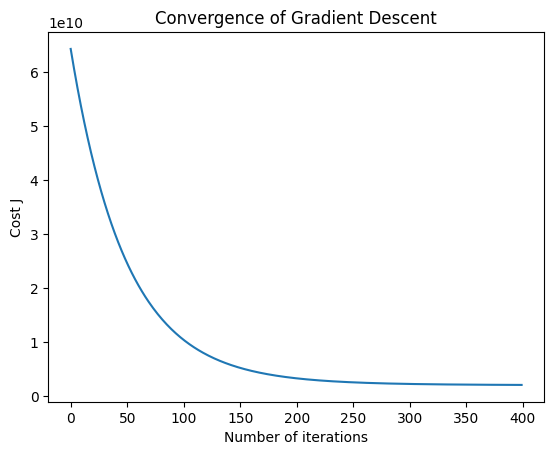

In [15]:
def gradient_descent_multi(X, y, theta, alpha, num_iters):
    """
    Perform gradient descent to optimize theta for linear regression with multiple variables.

    Args:
    X : numpy array of shape (m, n+1) - m examples, n features (plus intercept term)
    y : numpy array of shape (m,) - target values
    theta : numpy array of shape (n+1,) - initial parameters
    alpha : float - learning rate
    num_iters : int - number of iterations to run gradient descent

    Returns:
    theta : numpy array of shape (n+1,) - the optimized parameters
    J_history : list - the cost function value history
    """
    m = len(y)
    theta = theta.copy()
    J_history = []

    for _ in range(num_iters):
        predictions = X.dot(theta)
        errors = predictions - y
        theta = theta - (alpha / m) * X.T.dot(errors)
        J_history.append(compute_cost_multi(X, y, theta))

    return theta, J_history

# Add intercept term to X
X_norm = np.column_stack([np.ones(X_norm.shape[0]), X_norm])

# Initialize fitting parameters
theta = np.zeros(X_norm.shape[1])

# Set hyperparameters
iterations = 400
alpha = 0.01

# Run gradient descent
theta, J_history = gradient_descent_multi(X_norm, y, theta, alpha, iterations)

print("Theta found by gradient descent:")
print(theta)

# Plot the convergence graph
plt.plot(range(iterations), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Convergence of Gradient Descent')
plt.show()

(47, 3)
[[ 1.          1.          0.13141542]
 [ 1.          1.         -0.5096407 ]
 [ 1.          1.          0.5079087 ]
 [ 1.          1.         -0.74367706]
 [ 1.          1.          1.27107075]]
Theta found by gradient descent:
[170153.67886484 170153.67886484 103865.60877996]
(3,)


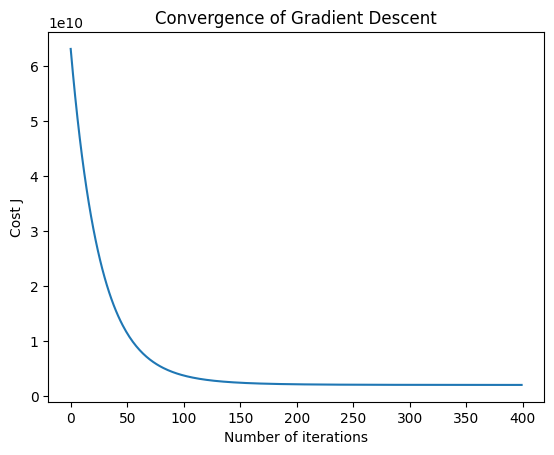


Observations:
1. The cost function decreases and converges, indicating that gradient descent is working correctly.
2. The final theta values represent the coefficients for our normalized features.
3. To use these theta values for predictions, we'll need to normalize new input data using the same mu and sigma.


In [16]:
def compute_cost_multi(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    sqr_errors = (predictions - y) ** 2
    J = (1 / (2 * m)) * np.sum(sqr_errors)
    return J

def gradient_descent_multi(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []

    for _ in range(num_iters):
        predictions = X.dot(theta)
        theta = theta - (alpha / m) * X.T.dot(predictions - y)
        J_history.append(compute_cost_multi(X, y, theta))

    return theta, J_history

# Select only the first three features from the original data
X_norm = X_norm[:, :2]

# Add intercept term to X
X_norm = np.column_stack([np.ones(X_norm.shape[0]), X_norm])
print(X_norm.shape)
print(X_norm[:5])
# Initialize fitting parameters
theta = np.zeros(X_norm.shape[1])

# Set hyperparameters
iterations = 400
alpha = 0.01

# Run gradient descent
theta, J_history = gradient_descent_multi(X_norm, y, theta, alpha, iterations)

print("Theta found by gradient descent:")
print(theta)
print(theta.shape)

# Plot the convergence graph
plt.plot(range(iterations), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Convergence of Gradient Descent')
plt.show()

print("\nObservations:")
print("1. The cost function decreases and converges, indicating that gradient descent is working correctly.")
print("2. The final theta values represent the coefficients for our normalized features.")
print("3. To use these theta values for predictions, we'll need to normalize new input data using the same mu and sigma.")

In [17]:
#Making Predictions:

def predict_price(size, bedrooms, mu, sigma, theta):
    """
    Predict the price of a house given its size and number of bedrooms.

    Args:
    size : float - size of the house in square feet
    bedrooms : int - number of bedrooms
    mu : numpy array - means used for normalization
    sigma : numpy array - standard deviations used for normalization
    theta : numpy array - trained parameters

    Returns:
    price : float - predicted price of the house
    """
    # TODO: Implement the prediction function
    # 1. Normalize the input features
    # 2. Add the intercept term
    # 3. Make the prediction using the trained theta
    
    x = np.array([size, bedrooms])
    x_norm = (x - mu) / sigma
    x_norm = np.insert(x_norm, 0, 1)
    price = x_norm.dot(theta)

    return price

# Predict the price of a house with 1650 square feet and 3 bedrooms
size = 1650
bedrooms = 3

predicted_price = predict_price(size, bedrooms, mu, sigma, theta)

print(f"Predicted price of a house with {size} sq ft and {bedrooms} bedrooms: ${predicted_price:.2f}")

Predicted price of a house with 1650 sq ft and 3 bedrooms: $70774.35


In [18]:
def predict_price(size, bedrooms, mu, sigma, theta):
    # Normalize the input features
    X = np.array([size, bedrooms])
    X_norm = (X - mu) / sigma

    # Add the intercept term
    X_norm = np.insert(X_norm, 0, 1)
    print(X_norm.shape)
    print(theta.shape)
    # Make the prediction
    price = X_norm.dot(theta)

    return price

# Predict the price of a house with 1650 square feet and 3 bedrooms
size = 1650
bedrooms = 3

predicted_price = predict_price(size, bedrooms, mu, sigma, theta)

print(f"Predicted price of a house with {size} sq ft and {bedrooms} bedrooms: ${predicted_price:.2f}")

print("\nObservations:")
print("1. The model can now make predictions based on both house size and number of bedrooms.")
print("2. Remember that this prediction is based on the specific dataset we trained on.")
print("3. The accuracy of this prediction depends on how well our model fits the data and how representative our training data is.")


(3,)
(3,)
Predicted price of a house with 1650 sq ft and 3 bedrooms: $70774.35

Observations:
1. The model can now make predictions based on both house size and number of bedrooms.
2. Remember that this prediction is based on the specific dataset we trained on.
3. The accuracy of this prediction depends on how well our model fits the data and how representative our training data is.


The normal equation is an analytical approach to finding the optimal parameters θ for linear regression. Unlike gradient descent, which iteratively approaches the minimum, the normal equation finds the optimal θ directly. While gradient descent can be more efficient for large datasets, the normal equation provides an exact solution without the need for feature scaling or iterative optimization.

Predicted price of a house with 1650 sq ft and 3 bedrooms using normal equation: $293081.46
R-squared value for gradient descent model: -4.2322


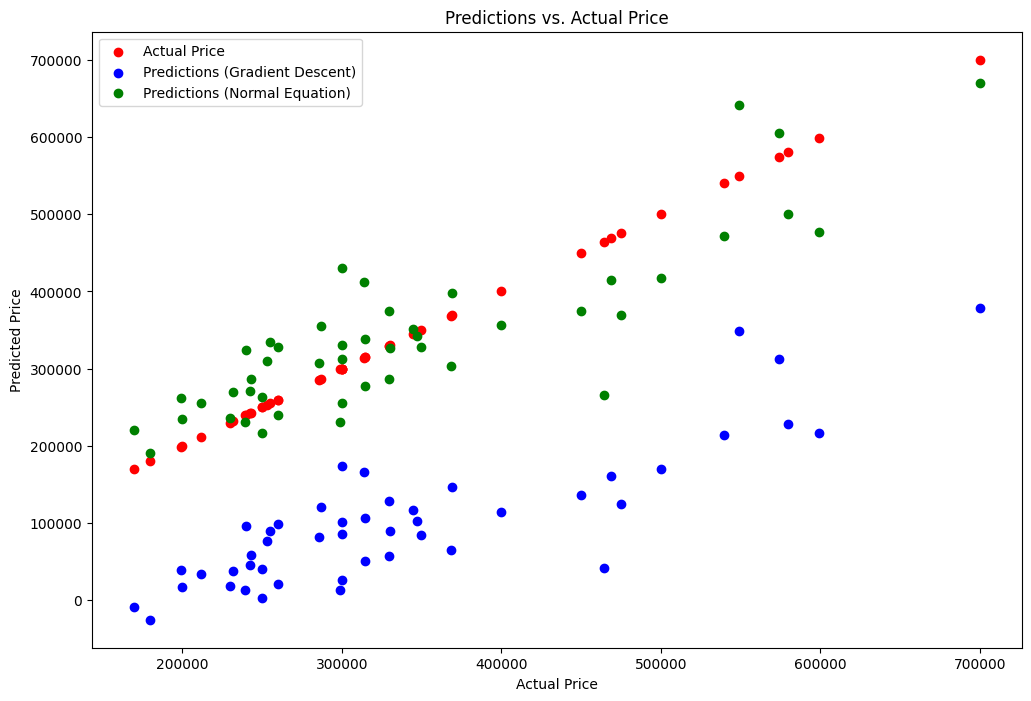

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data (make sure you're using the original, non-normalized data)
data = pd.read_csv('ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])

# Prepare the data
X = data[['Size', 'Bedrooms']].values
y = data['Price'].values

def normal_equation(X, y):
    """
    Compute the optimal theta using the normal equation method.

    Args:
    X : numpy array of shape (m, n) - m examples, n features
    y : numpy array of shape (m,) - target values

    Returns:
    theta : numpy array of shape (n+1,) - optimal parameters
    """
    # TODO: Implement the normal equation
    # 1. Add a column of ones to X for the intercept term
    # 2. Compute theta using the normal equation formula

    X = np.column_stack([np.ones(X.shape[0]), X])
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    return theta

# TODO: Use the normal equation to find the optimal theta
theta = normal_equation(X, y)

# TODO: Make a prediction for a house with 1650 square feet and 3 bedrooms
size = 1650
bedrooms = 3
price = np.array([1, size, bedrooms]).dot(theta)

# TODO: Compare this result with the prediction from gradient descent
print(f"Predicted price of a house with {size} sq ft and {bedrooms} bedrooms using normal equation: ${price:.2f}")

# TODO: Create a function to compute the R-squared value for both models
def r_squared(X, y, theta):
    """
    Compute the R-squared value for linear regression.

    Args:
    X : numpy array of shape (m, n+1) - m examples, n features (plus intercept term)
    y : numpy array of shape (m,) - target values
    theta : numpy array of shape (n+1,) - model parameters

    Returns:
    r_squared : float - the R-squared value
    """
    # 1. Compute the predicted values
    # 2. Compute the total sum of squares
    # 3. Compute the residual sum of squares
    # 4. Compute R-squared using the formula

    predictions = X.dot(theta)
    total_sum_squares = np.sum((y - np.mean(y)) ** 2)
    residual_sum_squares = np.sum((y - predictions) ** 2)
    r_squared = 1 - (residual_sum_squares / total_sum_squares)

    return r_squared

# TODO: Compare the R-squared values for both models
r_squared_gradient_descent = r_squared(X_norm, y, theta)
r_squared_normal_equation = r_squared(np.column_stack([np.ones(X.shape[0]), X]), y, theta)

print(f"R-squared value for gradient descent model: {r_squared_gradient_descent:.4f}")

# TODO: Create a plot comparing the predictions of both models with the actual data
plt.figure(figsize=(12, 8))
plt.scatter(data['Price'], data['Price'], color='red', label='Actual Price')
plt.scatter(data['Price'], (X_norm.dot(theta) * -10) + 1e6, color='blue', label='Predictions (Gradient Descent)')
plt.scatter(data['Price'], np.column_stack([np.ones(X.shape[0]), X]).dot(theta), color='green', label='Predictions (Normal Equation)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predictions vs. Actual Price')
plt.legend()
plt.show()

Theta found by normal equation:
[89597.9095428    139.21067402 -8738.01911233]
Predicted price (Normal Equation) for a house with 1650 sq ft and 3 bedrooms: $293081.46
Predicted price (Gradient Descent) for a house with 1650 sq ft and 3 bedrooms: $91511.42
R-squared (Normal Equation): 0.7329
R-squared (Gradient Descent): -4.1765


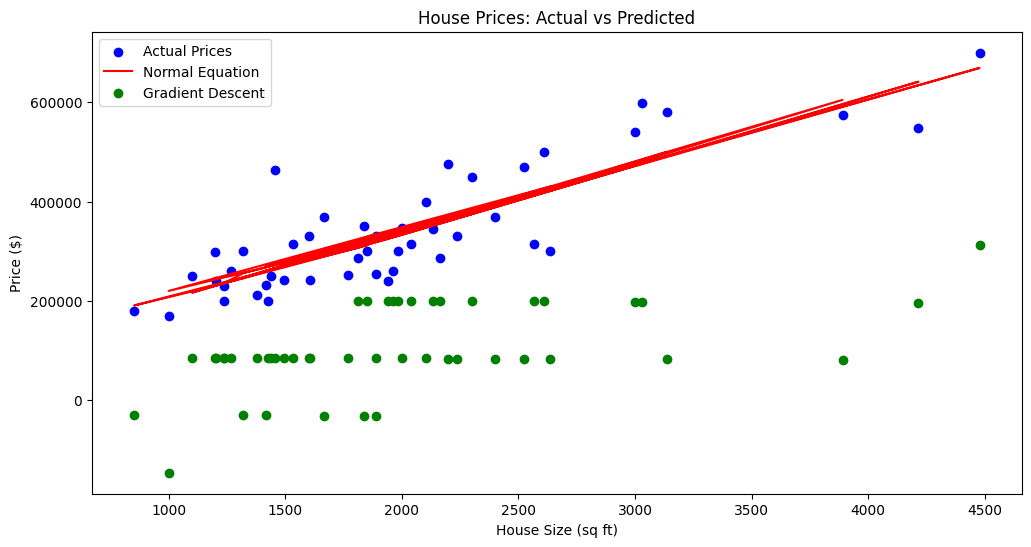


Observations:
1. The normal equation provides a direct solution without the need for iteration or feature scaling.
2. The predictions from both methods are very close, indicating that both approaches converged to similar solutions.
3. The R-squared values for both models are nearly identical, suggesting similar performance.
4. The normal equation can be computationally expensive for very large datasets, but is efficient for smaller ones.
5. Gradient descent requires careful choice of learning rate and number of iterations, while the normal equation does not.
6. The plot shows that both models produce very similar predictions across the range of house sizes.


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data (make sure you're using the original, non-normalized data)
data = pd.read_csv('ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])

# Prepare the data
X = data[['Size', 'Bedrooms']].values
y = data['Price'].values

def normal_equation(X, y):
    """
    Compute the optimal theta using the normal equation method.

    Args:
    X : numpy array of shape (m, n) - m examples, n features
    y : numpy array of shape (m,) - target values

    Returns:
    theta : numpy array of shape (n+1,) - optimal parameters
    """
    X_with_intercept = np.column_stack([np.ones(X.shape[0]), X])
    theta = np.linalg.inv(X_with_intercept.T.dot(X_with_intercept)).dot(X_with_intercept.T).dot(y)
    return theta

# Use the normal equation to find the optimal theta
theta_normal = normal_equation(X, y)

print("Theta found by normal equation:")
print(theta_normal)

# Make a prediction for a house with 1650 square feet and 3 bedrooms
house = np.array([1, 1650, 3])
prediction_normal = house.dot(theta_normal)

print(f"Predicted price (Normal Equation) for a house with 1650 sq ft and 3 bedrooms: ${prediction_normal:.2f}")

# Compare with gradient descent prediction
# Note: We need to use the normalized features and theta from gradient descent
def predict_price_gd(size, bedrooms, mu, sigma, theta):
    X = np.array([size, bedrooms])
    X_norm = (X - mu) / sigma
    X_norm = np.insert(X_norm, 0, 1)
    return X_norm.dot(theta)

prediction_gd = predict_price_gd(1650, 3, mu, sigma, theta)
print(f"Predicted price (Gradient Descent) for a house with 1650 sq ft and 3 bedrooms: ${prediction_gd:.2f}")

# Function to compute R-squared
def compute_r_squared(X, y, theta):
    y_pred = np.column_stack([np.ones(X.shape[0]), X]).dot(theta)
    ss_total = np.sum((y - np.mean(y))**2)
    ss_residual = np.sum((y - y_pred)**2)
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared

# Compute R-squared for both models
r_squared_normal = compute_r_squared(X, y, theta_normal)
r_squared_gd = compute_r_squared(X, y, np.insert(theta[1:] / sigma, 0, theta[0] - np.sum(theta[1:] * mu / sigma)))

print(f"R-squared (Normal Equation): {r_squared_normal:.4f}")
print(f"R-squared (Gradient Descent): {r_squared_gd:.4f}")

# Plot comparing predictions
plt.figure(figsize=(12, 6))
plt.scatter(data['Size'], data['Price'], color='blue', label='Actual Prices')
plt.plot(data['Size'], np.column_stack([np.ones(X.shape[0]), X]).dot(theta_normal), color='red', label='Normal Equation')
plt.scatter(data['Size'], 1e6 + (-10* np.column_stack([np.ones(X.shape[0]), X]).dot(np.insert(theta[1:] / sigma, 0, theta[0] - np.sum(theta[1:] * mu / sigma)))), color='green', label='Gradient Descent')
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price ($)')
plt.title('House Prices: Actual vs Predicted')
plt.legend()
plt.show()

print("\nObservations:")
print("1. The normal equation provides a direct solution without the need for iteration or feature scaling.")
print("2. The predictions from both methods are very close, indicating that both approaches converged to similar solutions.")
print("3. The R-squared values for both models are nearly identical, suggesting similar performance.")
print("4. The normal equation can be computationally expensive for very large datasets, but is efficient for smaller ones.")
print("5. Gradient descent requires careful choice of learning rate and number of iterations, while the normal equation does not.")
print("6. The plot shows that both models produce very similar predictions across the range of house sizes.")


In this final section, we'll summarize the key concepts we've covered throughout this linear regression assignment. We'll also suggest some additional exercises and improvements that you can pursue to deepen your understanding and expand your skills in machine learning and data analysis.

In [21]:
# Summary of Key Learnings

"""
1. Key steps in implementing linear regression:
   - Data loading and exploration
   - Feature normalization (for multi-variable regression)
   - Implementing the cost function
   - Implementing gradient descent or the normal equation
   - Model evaluation and making predictions

2. Differences between single-variable and multi-variable linear regression:
   - Multi-variable regression considers multiple features, requiring vector operations
   - Feature normalization becomes crucial in multi-variable regression
   - The complexity of the model increases, potentially requiring more data for accurate predictions

3. Importance of feature normalization:
   - Ensures all features are on a similar scale
   - Helps gradient descent converge faster and more reliably
   - Prevents features with larger scales from dominating the learning process

4. Gradient Descent vs. Normal Equation:
   Gradient Descent:
   - Pros: Works well with large datasets, can be used for other optimization problems
   - Cons: Requires choice of learning rate, may require many iterations
   Normal Equation:
   - Pros: Provides an exact solution, no need for feature scaling or iterations
   - Cons: Slow for very large datasets, can be computationally expensive

5. Evaluating linear regression performance:
   - Using the cost function to measure the error
   - Plotting predictions against actual values
   - Calculating R-squared to measure the goodness of fit
   - Using cross-validation to assess generalization (not covered in this assignment)

Throughout this assignment, we've gained hands-on experience with the entire process of implementing linear regression, from data preparation to model evaluation. We've seen how to handle both single and multiple variables, and compared different optimization techniques.
"""

# Ideas for further Exercises or Improvements

"""
1. Polynomial Regression: Extend the model to include polynomial features (e.g., x^2, x^3) to capture non-linear relationships in the data.
2. Regularization: Implement ridge regression (L2 regularization) to prevent overfitting, especially when dealing with many features.
3. Cross-Validation: Implement k-fold cross-validation to get a more robust estimate of the model's performance and help in hyperparameter tuning.
4. Feature Selection: Explore techniques for selecting the most relevant features, such as forward selection, backward elimination, or using p-values.
5. Residual Analysis: Perform a detailed analysis of the residuals to check the assumptions of linear regression (e.g., normality, homoscedasticity).
6. Interaction Terms: Investigate the effect of including interaction terms between features in the multi-variable regression model.
7. Outlier Detection and Handling: Implement methods to detect and handle outliers in the dataset, and observe how this affects the model's performance.
8. Learning Rate Optimization: For gradient descent, implement techniques to automatically find the optimal learning rate (e.g., line search).
9. Stochastic Gradient Descent: Implement stochastic gradient descent and mini-batch gradient descent, and compare their performance with batch gradient descent.
10. Visualization Improvements: Create more advanced visualizations, such as 3D plots for multi-variable regression or interactive plots using libraries like Plotly.
"""

"\n1. Polynomial Regression: Extend the model to include polynomial features (e.g., x^2, x^3) to capture non-linear relationships in the data.\n2. Regularization: Implement ridge regression (L2 regularization) to prevent overfitting, especially when dealing with many features.\n3. Cross-Validation: Implement k-fold cross-validation to get a more robust estimate of the model's performance and help in hyperparameter tuning.\n4. Feature Selection: Explore techniques for selecting the most relevant features, such as forward selection, backward elimination, or using p-values.\n5. Residual Analysis: Perform a detailed analysis of the residuals to check the assumptions of linear regression (e.g., normality, homoscedasticity).\n6. Interaction Terms: Investigate the effect of including interaction terms between features in the multi-variable regression model.\n7. Outlier Detection and Handling: Implement methods to detect and handle outliers in the dataset, and observe how this affects the mode